In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.tree import export_text
import mglearn
from dashboard_one import *
from dash_model_two import *
from feature_selection import *
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# before remove labels, should do some statistics analysis. include the infomation.
# or do it binary--- healthy and unhealthy
# chances 
# use oversampling instead of under sampling

# level of good predictors
# 0.5: suggestive
# 0.7: 
# check other papers how they describe ml models
# observation number

### brain volume_____VS_____diagnosischanges from every visit


In [2]:
com_col = ['Phase', 'RID', 'VISCODE2','PTID']
target = 'DIAG_GROUP'

In [3]:
df = pd.read_csv('main_file_1206_wz.csv').iloc[:,1:].drop(['NPIKSEV'],axis=1)
df = df[df['DIAG_GROUP'].notna()].reset_index().drop(['index'],axis=1)   # keep the rows where DXCHANGE is not nan
df

,RID,DIAG,VISCODE2,PTID,AGE,PTGENDER,PTEDUCAT,Phase,EXAMDATE,Ventricles,...,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,OSA,PREV_DIAG,DIAG_CHANGED,DIAG_GROUP
0,2,NL,sc,011_S_0002,74.3,Male,16.0,ADNI1,2005-08-09,118233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
1,2,NL,bl,011_S_0002,74.3,Male,16.0,ADNI1,2005-08-09,118233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
2,2,NL,m06,011_S_0002,74.3,Male,16.0,ADNI1,2006-06-03,118233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
3,2,NL,m36,011_S_0002,74.3,Male,16.0,ADNI1,2008-08-27,118233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
4,2,NL,m60,011_S_0002,74.3,Male,16.0,ADNI1,2010-09-22,118233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22196,7102,NL,sc,341_S_7102,NaN,NaN,NaN,ADNI3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
22197,7103,NL,sc,013_S_7103,NaN,NaN,NaN,ADNI3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
22198,7104,NL,sc,153_S_7104,NaN,NaN,NaN,ADNI3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
22199,7105,MCI,sc,035_S_7105,NaN,NaN,NaN,ADNI3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,MCI,False,MCI-MCI


### sleep______VS______DXCHANGE

In [4]:
df.columns

Index(['RID', 'DIAG', 'VISCODE2', 'PTID', 'AGE', 'PTGENDER', 'PTEDUCAT',
       'Phase', 'EXAMDATE', 'Ventricles', 'Hippocampus', 'WholeBrain',
       'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'Ventricles_bl',
       'Hippocampus_bl', 'WholeBrain_bl', 'Entorhinal_bl', 'Fusiform_bl',
       'MidTemp_bl', 'ICV_bl', 'ABETA', 'TAU', 'PTAU', 'ABETA_bl', 'TAU_bl',
       'PTAU_bl', 'ratio_Ventricles_bl', 'ratio_Hippocampus_bl',
       'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl', 'ratio_Fusiform_bl',
       'ratio_ICV_bl', 'ratio_ABETA_bl', 'ratio_TAU_bl', 'ratio_PTAU_bl',
       'EXAMDATE_bl', 'duration_in_days', 'Ventricles_reduction_per_year',
       'Hippocampus_reduction_per_year', 'wholebrain_reduction_per_year',
       'Entorhinal_reduction_per_year', 'Fusiform_reduction_per_year',
       'ICV_reduction_per_year', 'ABETA_reduction_per_year',
       'TAU_reduction_per_year', 'PTAU_reduction_per_year', 'insomnia',
       'NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', '

In [5]:
col_lst = [ target,'Ventricles_reduction_per_year',
       'Hippocampus_reduction_per_year', 'wholebrain_reduction_per_year',
       'Entorhinal_reduction_per_year', 'Fusiform_reduction_per_year',
       'ICV_reduction_per_year']
df1 = df[com_col + col_lst].set_index(com_col).dropna(how='any',axis=0).reset_index()

# we want to make the model stays simply, therefore we ask the question which is important for the people are involved.
# will it get BETTER or not?
# two groups: MCI-AD or (MCI-MCI, MCI-NL)

label_map_better = { 'MCI-MCI':'MCI-MCIAD','MCI-AD':'MCI-MCIAD','MCI-NL':'MCI-NL','AD-NL':'AD-NLMCI','AD-MCI':'AD-NLMCI','AD-AD':'AD-AD'}
df1_better = df1.copy()
df1_better[target] = df1_better[target].map(label_map_better)

# will it get WORSE or not?
label_map_worse = { 'MCI-NL':'MCI-NLMCI','MCI-MCI':'MCI-NLMCI','MCI-AD':'MCI-AD'}
df1_worse =  df1.copy() 
df1_worse[target] = df1_worse[target].map(label_map_worse)

In [6]:
df1.groupby(target).count()

,Phase,RID,VISCODE2,PTID,Ventricles_reduction_per_year,Hippocampus_reduction_per_year,wholebrain_reduction_per_year,Entorhinal_reduction_per_year,Fusiform_reduction_per_year,ICV_reduction_per_year
DIAG_GROUP,,,,,,,,,,
AD-AD,2406,2406,2406,2406,2406,2406,2406,2406,2406,2406
AD-MCI,28,28,28,28,28,28,28,28,28,28
AD-NL,2,2,2,2,2,2,2,2,2,2
MCI-AD,215,215,215,215,215,215,215,215,215,215
MCI-MCI,6382,6382,6382,6382,6382,6382,6382,6382,6382,6382
MCI-NL,72,72,72,72,72,72,72,72,72,72
NL-MCI,86,86,86,86,86,86,86,86,86,86
NL-NL,6214,6214,6214,6214,6214,6214,6214,6214,6214,6214


In [7]:
np.sum(df1.isna())   # check nan

Phase                             0
RID                               0
VISCODE2                          0
PTID                              0
DIAG_GROUP                        0
Ventricles_reduction_per_year     0
Hippocampus_reduction_per_year    0
wholebrain_reduction_per_year     0
Entorhinal_reduction_per_year     0
Fusiform_reduction_per_year       0
ICV_reduction_per_year            0
dtype: int64

Text(0, 0.5, 'count')

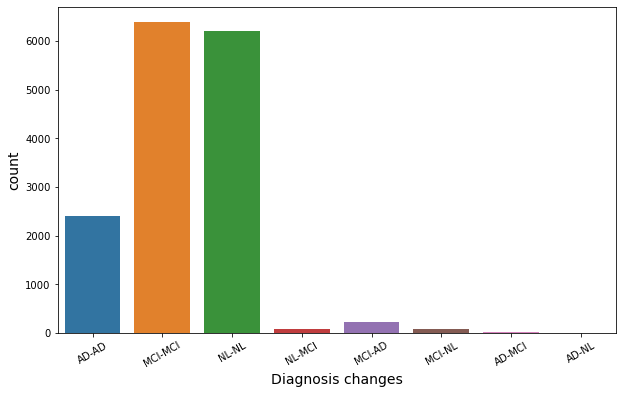

In [8]:
f, axes = plt.subplots(figsize=(10, 6))
sns.countplot(data=df1, x= target)
plt.tick_params(axis='x',labelrotation=30)
plt.xlabel('Diagnosis changes',fontsize=14)
plt.ylabel('count',fontsize=14)

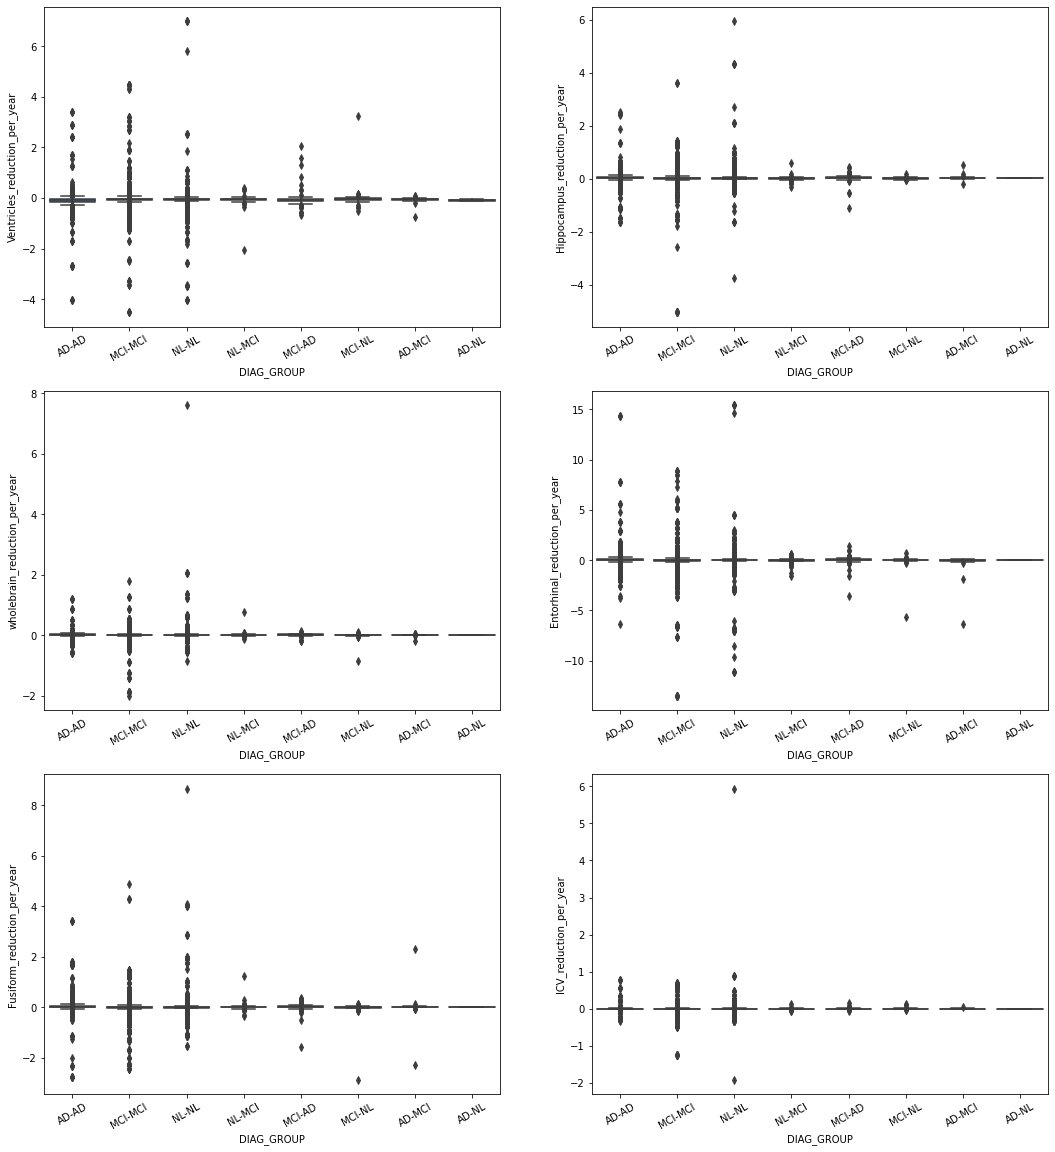

In [16]:
lst = ['Ventricles_reduction_per_year',
       'Hippocampus_reduction_per_year', 'wholebrain_reduction_per_year',
       'Entorhinal_reduction_per_year', 'Fusiform_reduction_per_year',
       'ICV_reduction_per_year']

f,axes = plt.subplots(nrows = len(lst)//2 ,ncols=2,figsize=(18,20))
axes = axes.ravel()
#labels = [1,2,3,4,5,6,7,8]
for i in range(len(lst)):
    ax = sns.boxplot(data=df1, y=lst[i],x= target,ax = axes[i])
for ax in f.axes: # rotate x ticks
    #ax.set_xticks(rotation=45, ha='right')
    #ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.tick_params(axis='x',labelrotation=30)

- AD-NL too little data

- groups:
    - NL-NL, NL-MCI, 
    - MCI-MCI, MCI-NL, MCI-AD
    - AD-AD, AD-(MCI+NL)

In [10]:
df1_better[target].unique()

array(['AD-AD', 'MCI-MCIAD', nan, 'MCI-NL', 'AD-NLMCI'], dtype=object)

In [11]:
df1.groupby(target).count()

,Phase,RID,VISCODE2,PTID,Ventricles_reduction_per_year,Hippocampus_reduction_per_year,wholebrain_reduction_per_year,Entorhinal_reduction_per_year,Fusiform_reduction_per_year,ICV_reduction_per_year
DIAG_GROUP,,,,,,,,,,
AD-AD,2406,2406,2406,2406,2406,2406,2406,2406,2406,2406
AD-MCI,28,28,28,28,28,28,28,28,28,28
AD-NL,2,2,2,2,2,2,2,2,2,2
MCI-AD,215,215,215,215,215,215,215,215,215,215
MCI-MCI,6382,6382,6382,6382,6382,6382,6382,6382,6382,6382
MCI-NL,72,72,72,72,72,72,72,72,72,72
NL-MCI,86,86,86,86,86,86,86,86,86,86
NL-NL,6214,6214,6214,6214,6214,6214,6214,6214,6214,6214


In [12]:
g1 = df1.loc[df1[target].isin(['NL-NL','NL-MCI'])].reset_index(drop=True)
g2 = df1.loc[df1[target].isin(['MCI-NL','MCI-MCI','MCI-AD'])].reset_index(drop=True)
g2_better = df1_better.loc[df1_better[target].isin(['MCI-NL','MCI-MCIAD'])].reset_index(drop=True)
g2_worse = df1_worse.loc[df1_worse[target].isin(['MCI-NLMCI','MCI-AD'])].reset_index(drop=True)
g3 = df1.loc[df1[target].isin(['AD-MCI','AD-AD'])].reset_index(drop=True)
g3_better = df1_better.loc[df1_better[target].isin(['AD-NLMCI','AD-AD'])].reset_index(drop=True) 

### oversampling and undersampling

- functions
    - models(df,drop_lst,target) : under sampling, split, scale, pca, models
    - cv_models(df,drop_lst,target,k): under sampling, NOT SPLIT, scale, pca, models with cross-validation 

In [13]:
drop_lst = ['Phase', 'RID', 'VISCODE2', 'PTID',target]
k = 10

### is a patient with NL keep NL or not?

In [14]:
cv_models(g1,drop_lst,target,k)

After undersampling data size is 172 ; Resampled dataset shape Counter({'NL-MCI': 86, 'NL-NL': 86})

2 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.351
          - saga_L1, average weighted f1-score of 10-cross validation:0.327
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.340
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.415
          - saga_L1, average weighted f1-score of 10-cross validation:0.321
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.415
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.525
          - saga_L1, average weighted f1-score of 10-cross validation:0.321
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.525
       - C = 1
          - lb

          - 25trees. average weighted f1-score of 10-cross validation:0.514
          - 30trees. average weighted f1-score of 10-cross validation:0.512
          - 35trees. average weighted f1-score of 10-cross validation:0.533
          - 40trees. average weighted f1-score of 10-cross validation:0.554
          - 45trees. average weighted f1-score of 10-cross validation:0.568
          - 50trees. average weighted f1-score of 10-cross validation:0.543
          - 55trees. average weighted f1-score of 10-cross validation:0.536
          - 60trees. average weighted f1-score of 10-cross validation:0.535
          - 65trees. average weighted f1-score of 10-cross validation:0.542
          - 70trees. average weighted f1-score of 10-cross validation:0.531
          - 75trees. average weighted f1-score of 10-cross validation:0.526
          - 80trees. average weighted f1-score of 10-cross validation:0.532
          - 85trees. average weighted f1-score of 10-cross validation:0.537
          - 

KeyboardInterrupt: 

After undersampling data size is 172 ; Resampled dataset shape Counter({'NL-MCI': 86, 'NL-NL': 86})

2 principle components are needed to explain 90% of the data

Features sorted by their score for each estimator 


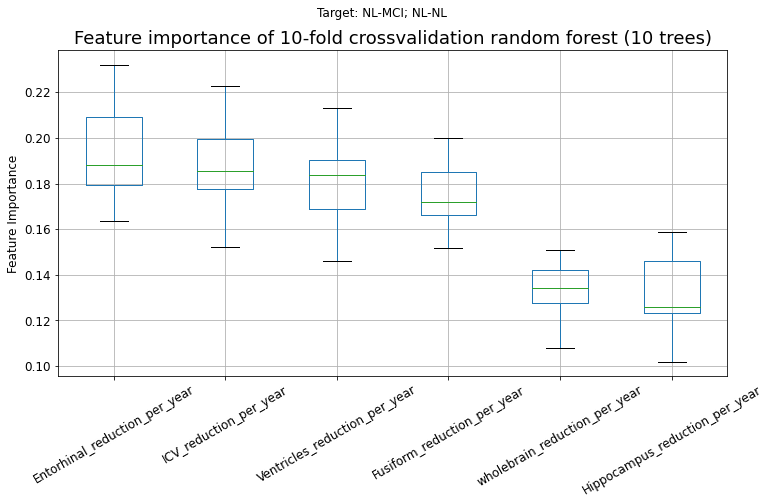

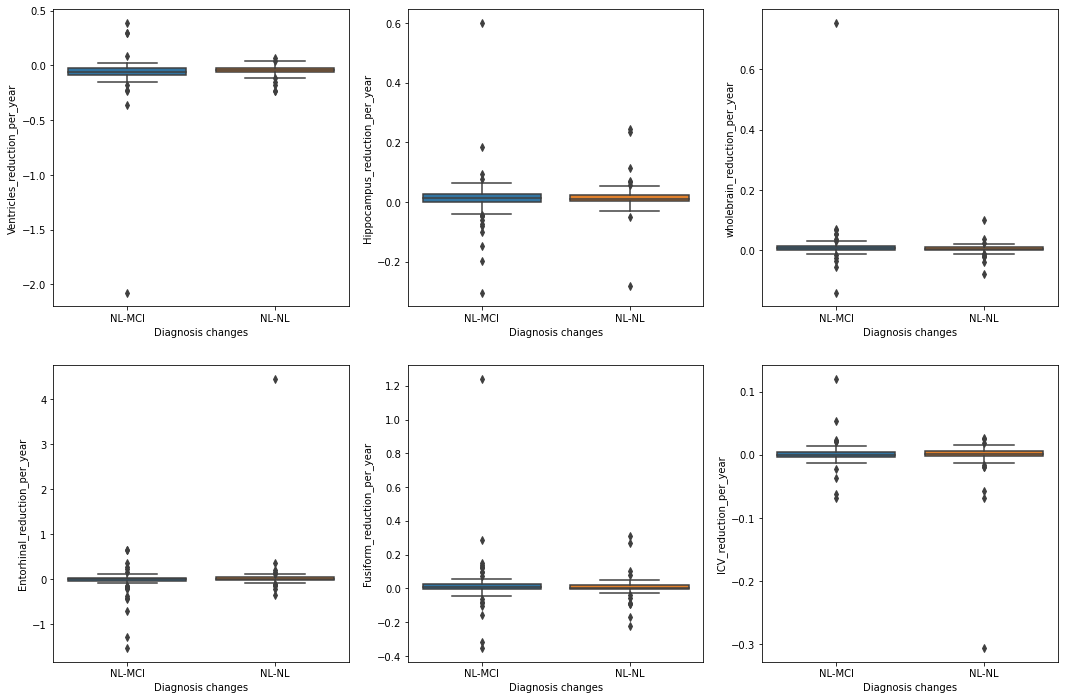

In [17]:
# 45trees. average weighted f1-score of 10-cross validation:0.568
n = 10
res = usampling_scale_data(g1,drop_lst,target)     
X = res[0]  # unscaled input
y = res[3]
clf = RandomForestClassifier(n_estimators =n, random_state = 5862)
title_label = '{}-fold crossvalidation random forest ({} trees)'.format(k,n)
feature_importance(X,y,clf,k,title_label)
plt.suptitle('Target: NL-MCI; NL-NL')

# plot the diagnosis distribution 
df_new = X.copy()
df_new[target] = y
f,axes = plt.subplots(nrows = len(lst)//3,ncols=3,figsize=(18,12))
axes = axes.ravel()

for i in range(len(lst)):
    ax = sns.boxplot(data=df_new, y=lst[i],x= target,ax = axes[i])
    ax.set(xlabel='Diagnosis changes')

In [18]:
cv_models(g2,drop_lst,target,k)  # 0.507

After undersampling data size is 216 ; Resampled dataset shape Counter({'MCI-AD': 72, 'MCI-MCI': 72, 'MCI-NL': 72})

2 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.284
          - saga_L1, average weighted f1-score of 10-cross validation:0.167
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.284
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.299
          - saga_L1, average weighted f1-score of 10-cross validation:0.163
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.299
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.281
          - saga_L1, average weighted f1-score of 10-cross validation:0.159
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.281
       - C = 

KeyboardInterrupt: 

In [19]:
cv_models(g2_better,drop_lst,target,k)  # 0.523

After undersampling data size is 144 ; Resampled dataset shape Counter({'MCI-MCIAD': 72, 'MCI-NL': 72})

1 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.330
          - saga_L1, average weighted f1-score of 10-cross validation:0.326
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.356
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.397
          - saga_L1, average weighted f1-score of 10-cross validation:0.334
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.397
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.386
          - saga_L1, average weighted f1-score of 10-cross validation:0.326
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.386
       - C = 1
          

KeyboardInterrupt: 

In [ ]:
# 
n = 30
res = usampling_scale_data(g2_better,drop_lst,target)     
X = res[0]  # unscaled input
y = res[3]
clf = RandomForestClassifier(n_estimators =n, random_state = 5862)
title_label = '{}-fold crossvalidation random forest ({} trees)'.format(k,n)
feature_importance(X,y,clf,k,title_label)
plt.suptitle('Target: MCI-NL: 74, MCI-MCIAD: 74')

# plot the diagnosis distribution 
df_new = X.copy()
df_new[target] = y
f,axes = plt.subplots(nrows = len(lst)//3,ncols=3,figsize=(18,12))
axes = axes.ravel()
for i in range(len(lst)):
    ax = sns.boxplot(data=df_new, y=lst[i],x= target,ax = axes[i])
    ax.set_xticklabels(['MCI-MCI or MCI-AD','MCI-NL'])
    ax.set(xlabel='Diagnosis changes')

In [20]:
cv_models(g2_worse,drop_lst,target,k)

After undersampling data size is 430 ; Resampled dataset shape Counter({'MCI-AD': 215, 'MCI-NLMCI': 215})

2 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.336
          - saga_L1, average weighted f1-score of 10-cross validation:0.339
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.336
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.569
          - saga_L1, average weighted f1-score of 10-cross validation:0.336
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.569
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.622
          - saga_L1, average weighted f1-score of 10-cross validation:0.347
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.622
       - C = 1
        

KeyboardInterrupt: 

After undersampling data size is 430 ; Resampled dataset shape Counter({'MCI-AD': 215, 'MCI-NLMCI': 215})

2 principle components are needed to explain 90% of the data

Features sorted by their score for each estimator 


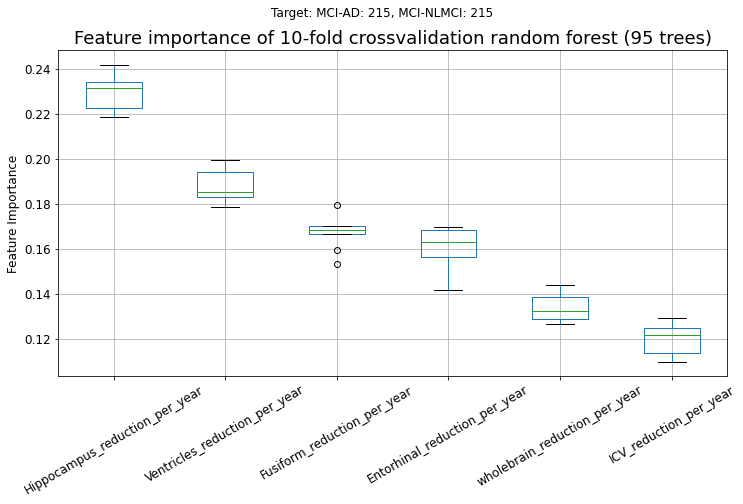

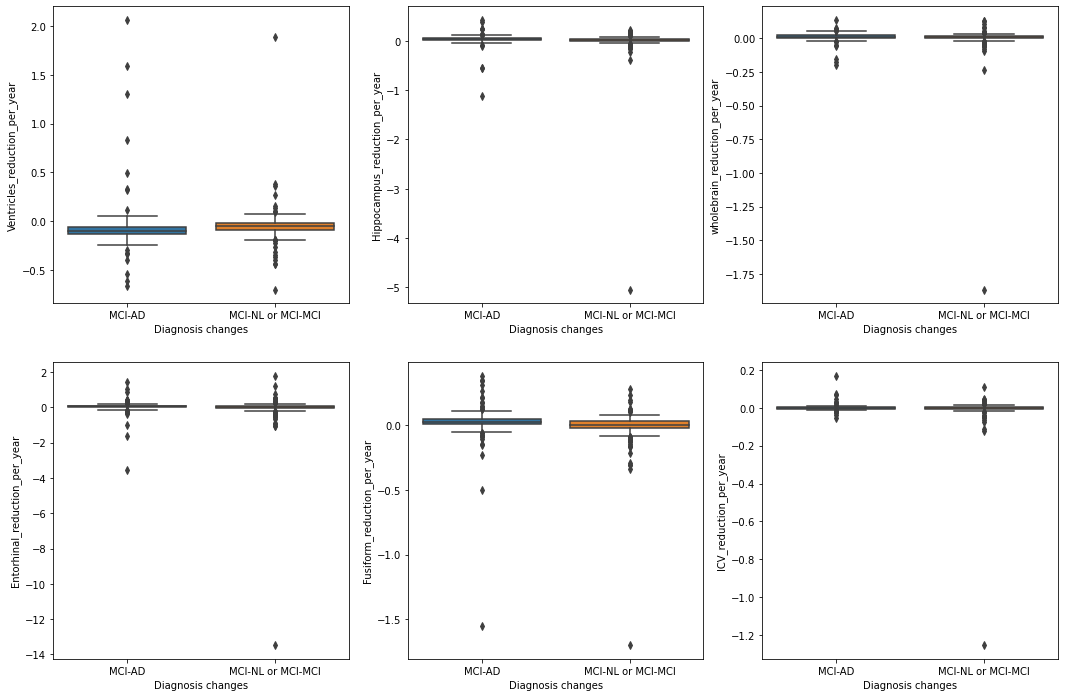

In [21]:
# 95trees. average weighted f1-score of 10-cross validation:0.713

n = 95
res = usampling_scale_data(g2_worse,drop_lst,target)     
X = res[0]  # unscaled input
y = res[3]
clf = RandomForestClassifier(n_estimators =n, random_state = 5862)
title_label = '{}-fold crossvalidation random forest ({} trees)'.format(k,n)
feature_importance(X,y,clf,k,title_label)
plt.suptitle('Target: MCI-AD: 215, MCI-NLMCI: 215')

# plot the diagnosis distribution 
df_new = X.copy()
df_new[target] = y
f,axes = plt.subplots(nrows = len(lst)//3,ncols=3,figsize=(18,12))
axes = axes.ravel()


for i in range(len(lst)):
    ax = sns.boxplot(data=df_new, y=lst[i],x= target,ax = axes[i])
    ax.set_xticklabels(['MCI-AD','MCI-NL or MCI-MCI'])
    ax.set(xlabel='Diagnosis changes')

In [22]:
cv_models(g3,drop_lst,target,k)

After undersampling data size is 56 ; Resampled dataset shape Counter({'AD-AD': 28, 'AD-MCI': 28})

2 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.408
          - saga_L1, average weighted f1-score of 10-cross validation:0.314
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.383
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.383
          - saga_L1, average weighted f1-score of 10-cross validation:0.336
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.383
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.448
          - saga_L1, average weighted f1-score of 10-cross validation:0.291
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.448
       - C = 1
          - lbf

          - 25trees. average weighted f1-score of 10-cross validation:0.645
          - 30trees. average weighted f1-score of 10-cross validation:0.645
          - 35trees. average weighted f1-score of 10-cross validation:0.662
          - 40trees. average weighted f1-score of 10-cross validation:0.680
          - 45trees. average weighted f1-score of 10-cross validation:0.632
          - 50trees. average weighted f1-score of 10-cross validation:0.632
          - 55trees. average weighted f1-score of 10-cross validation:0.662
          - 60trees. average weighted f1-score of 10-cross validation:0.616
          - 65trees. average weighted f1-score of 10-cross validation:0.616
          - 70trees. average weighted f1-score of 10-cross validation:0.598
          - 75trees. average weighted f1-score of 10-cross validation:0.616
          - 80trees. average weighted f1-score of 10-cross validation:0.616
          - 85trees. average weighted f1-score of 10-cross validation:0.616
          - 

After undersampling data size is 56 ; Resampled dataset shape Counter({'AD-AD': 28, 'AD-MCI': 28})

2 principle components are needed to explain 90% of the data

Features sorted by their score for each estimator 


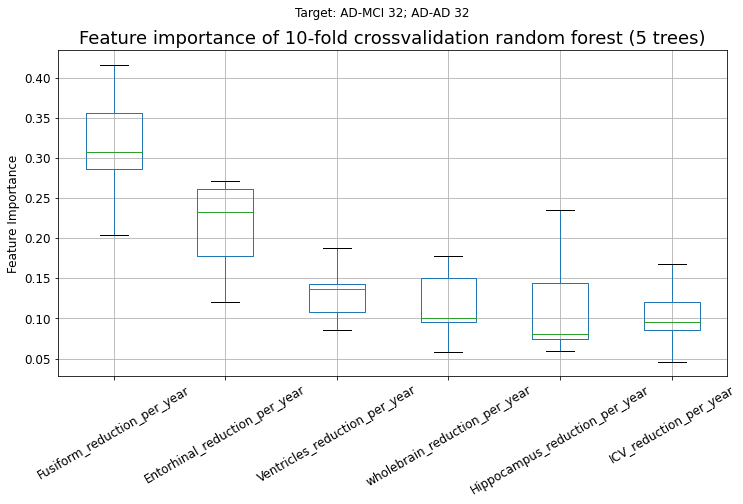

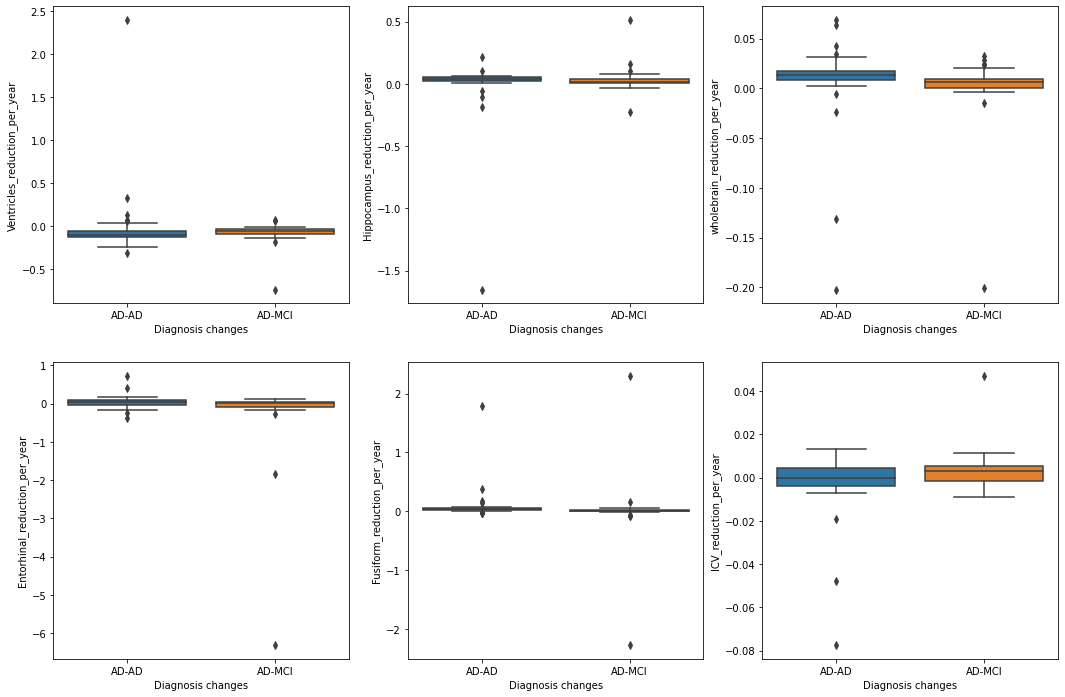

In [23]:
# 5trees. average weighted f1-score of 10-cross validation:0.699
n = 5
res = usampling_scale_data(g3,drop_lst,target)     
X = res[0]  # unscaled input
y = res[3]
clf = RandomForestClassifier(n_estimators =n, random_state = 5862)
title_label = '{}-fold crossvalidation random forest ({} trees)'.format(k,n)
feature_importance(X,y,clf,k,title_label)
plt.suptitle('Target: AD-MCI 32; AD-AD 32')

# plot the diagnosis distribution 
df_new = X.copy()
df_new[target] = y
f,axes = plt.subplots(nrows = len(lst)//3,ncols=3,figsize=(18,12))
axes = axes.ravel()

for i in range(len(lst)):
    ax = sns.boxplot(data=df_new, y=lst[i],x= target,ax = axes[i])
    ax.set(xlabel='Diagnosis changes')

### keep this one: is a patient with MCI get worse or not

In [24]:
cv_models(g3_better,drop_lst,target,k)

After undersampling data size is 60 ; Resampled dataset shape Counter({'AD-AD': 30, 'AD-NLMCI': 30})

2 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.497
          - saga_L1, average weighted f1-score of 10-cross validation:0.333
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.435
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.435
          - saga_L1, average weighted f1-score of 10-cross validation:0.333
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.435
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.435
          - saga_L1, average weighted f1-score of 10-cross validation:0.333
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.435
       - C = 1
          - l

          - 25trees. average weighted f1-score of 10-cross validation:0.649
          - 30trees. average weighted f1-score of 10-cross validation:0.649
          - 35trees. average weighted f1-score of 10-cross validation:0.649
          - 40trees. average weighted f1-score of 10-cross validation:0.633
          - 45trees. average weighted f1-score of 10-cross validation:0.633
          - 50trees. average weighted f1-score of 10-cross validation:0.662
          - 55trees. average weighted f1-score of 10-cross validation:0.615
          - 60trees. average weighted f1-score of 10-cross validation:0.633
          - 65trees. average weighted f1-score of 10-cross validation:0.615
          - 70trees. average weighted f1-score of 10-cross validation:0.633
          - 75trees. average weighted f1-score of 10-cross validation:0.633
          - 80trees. average weighted f1-score of 10-cross validation:0.633
          - 85trees. average weighted f1-score of 10-cross validation:0.615
          - 

After undersampling data size is 60 ; Resampled dataset shape Counter({'AD-AD': 30, 'AD-NLMCI': 30})

2 principle components are needed to explain 90% of the data

Features sorted by their score for each estimator 


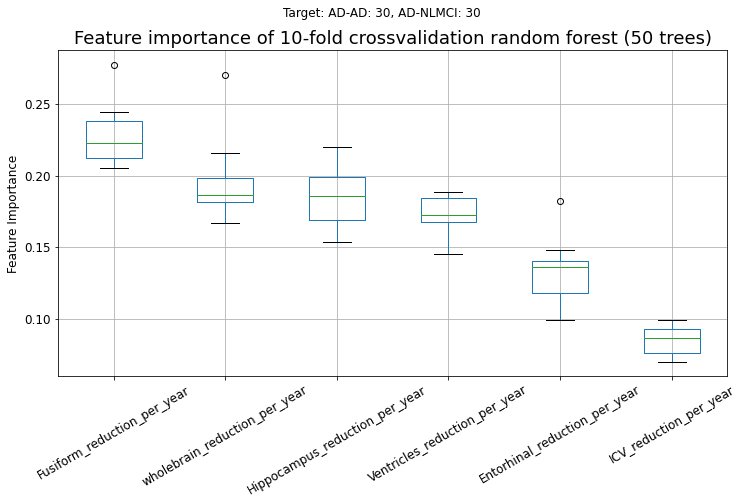

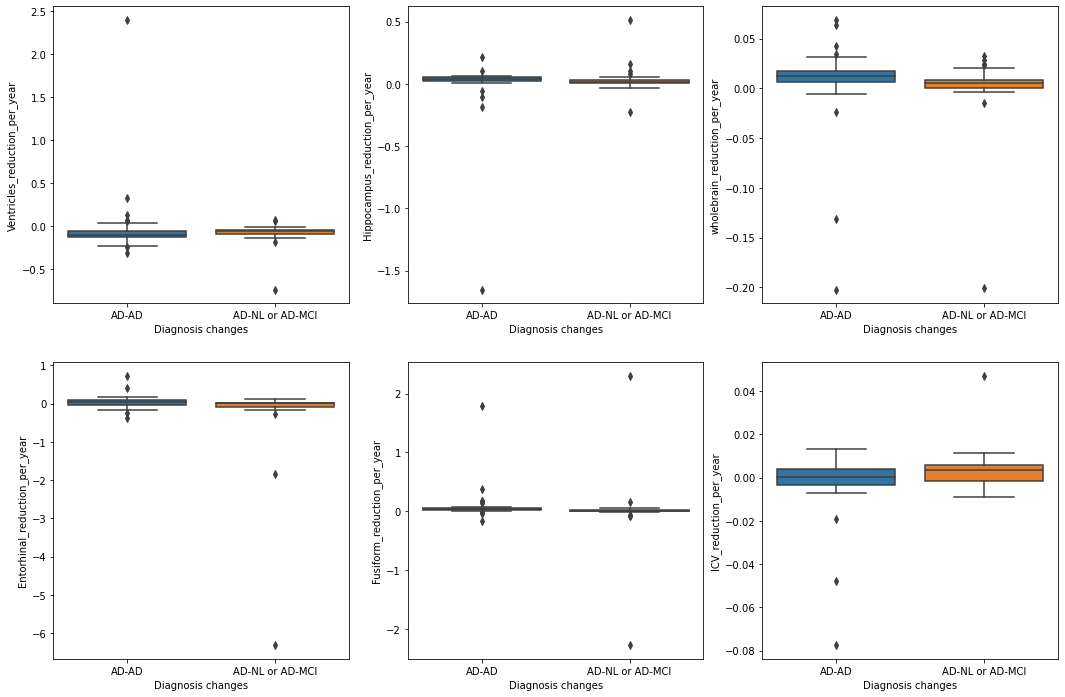

In [26]:
# 50trees. average weighted f1-score of 10-cross validation:0.662
n = 50
res = usampling_scale_data(g3_better,drop_lst,target)     
X = res[0]  # unscaled input
y = res[3]
clf = RandomForestClassifier(n_estimators =n, random_state = 5862)
title_label = '{}-fold crossvalidation random forest ({} trees)'.format(k,n)
feature_importance(X,y,clf,k,title_label)
plt.suptitle('Target: AD-AD: 30, AD-NLMCI: 30')

# plot the diagnosis distribution 
df_new = X.copy()
df_new[target] = y
f,axes = plt.subplots(nrows = len(lst)//3,ncols=3,figsize=(18,12))
axes = axes.ravel()

for i in range(len(lst)):
    ax = sns.boxplot(data=df_new, y=lst[i],x= target,ax = axes[i])
    ax.set_xticklabels(['AD-AD','AD-NL or AD-MCI'])
    ax.set(xlabel='Diagnosis changes')

In [28]:
# not include
cv_models(g2,drop_lst,target,k)

After undersampling data size is 216 ; Resampled dataset shape Counter({'MCI-AD': 72, 'MCI-MCI': 72, 'MCI-NL': 72})

2 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.284
          - saga_L1, average weighted f1-score of 10-cross validation:0.159
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.284
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.299
          - saga_L1, average weighted f1-score of 10-cross validation:0.159
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.299
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.281
          - saga_L1, average weighted f1-score of 10-cross validation:0.163
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.281
       - C = 

          - 25trees. average weighted f1-score of 10-cross validation:0.500
          - 30trees. average weighted f1-score of 10-cross validation:0.487
          - 35trees. average weighted f1-score of 10-cross validation:0.479
          - 40trees. average weighted f1-score of 10-cross validation:0.492
          - 45trees. average weighted f1-score of 10-cross validation:0.472
          - 50trees. average weighted f1-score of 10-cross validation:0.490
          - 55trees. average weighted f1-score of 10-cross validation:0.472
          - 60trees. average weighted f1-score of 10-cross validation:0.478
          - 65trees. average weighted f1-score of 10-cross validation:0.471
          - 70trees. average weighted f1-score of 10-cross validation:0.477
          - 75trees. average weighted f1-score of 10-cross validation:0.470
          - 80trees. average weighted f1-score of 10-cross validation:0.466
          - 85trees. average weighted f1-score of 10-cross validation:0.482
          - 

In [ ]:
# not keep
cv_models(g3,drop_lst,target,k)

In [ ]:
# not include
# - 85trees. average weighted f1-score of 10-cross validation:0.721
res = usampling_scale_data(g3,drop_lst,target)     
X = res[0]  # unscaled input
y = res[3]
clf = RandomForestClassifier(n_estimators =85, random_state = 5862)
title_label = '10-fold crossvalidation random forest (85 trees)'
feature_importance(X,y,clf,10,title_label)
plt.suptitle('Target: MCI-AD; MCI-MCI')

In [ ]:
# not include
cv_models(g4,drop_lst,target,k)

# pca - 55trees. average weighted f1-score of 10-cross validation:0.633
# scaled data - C = 0.1
          #- lbfgs_L2, average weighted f1-score of 10-cross validation:0.723

In [ ]:
# not include
cv_models(g5,drop_lst,target,k) 
# pca- tree depth: 7.000. average weighted f1-score of 10-cross validation:0.693
# pca - 90trees. average weighted f1-score of 10-cross validation:0.626

In [ ]:
# not include
cv_models(g21,drop_lst,target,k) # no good model

In [ ]:
# not include
cv_models(g22,drop_lst,target,k)  # no good models

In [ ]:
# not include
cv_models(g23,drop_lst,target,k)

In [ ]:
# - 20trees. average weighted f1-score of 10-cross validation:0.718
res = usampling_scale_data(g23,drop_lst,target)     
X = res[0]  # unscaled input
y = res[3]
clf = RandomForestClassifier(n_estimators =20, random_state = 5862)
title_label = '10-fold crossvalidation random forest (20 trees)'
feature_importance(X,y,clf,10,title_label)
plt.suptitle('Target: MCI-AD: 130, MCI-MCI: 130')

In [ ]:
# not include
cv_models(g24,drop_lst,target,k)

In [ ]:
# - 10trees. average weighted f1-score of 10-cross validation:0.653
res = usampling_scale_data(g24,drop_lst,target)     
X = res[0]  # unscaled input
y = res[3]
clf = RandomForestClassifier(n_estimators =10, random_state = 5862)
title_label = '10-fold crossvalidation random forest (10 trees)'
feature_importance(X,y,clf,10,title_label)
plt.suptitle('Target: MCI-AD: 40, MCI-NL: 40')

In [ ]:
# not include
cv_models(g25,drop_lst,target,k)